## CNN using Keras - CIFAR-10 Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [3]:
from tensorflow.keras.datasets import cifar10


(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(x_train.shape, " ",y_train.shape)
print(x_test.shape, " ",y_test.shape)

(50000, 32, 32, 3)   (50000, 1)
(10000, 32, 32, 3)   (10000, 1)


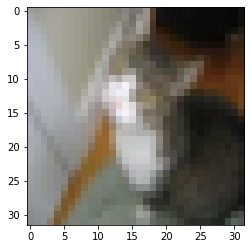

Image Label - [3]


In [36]:
image = x_train[101]
plt.imshow(image, cmap="gray")
plt.show()

print("Image Label -",y_train[101])

### One hot Encoding

In [37]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

print("Label ",y_train[0])
print("One hot encoded ",y_cat_train[0])

Label  [6]
One hot encoded  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Normalizing Data

In [38]:
x_train[0].shape

(32, 32, 3)

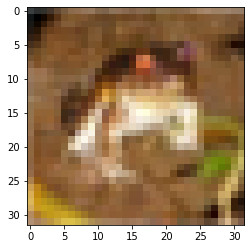

In [39]:
x_train = x_train/255
x_test = x_test/255

plt.imshow(x_train[0], cmap="gray")
plt.show()

### Reshaping

In [40]:
print("Before - ",x_train.shape)

# # dim = (batchsize, x(width), y(height), color_channels)
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

print("After - ",x_train.shape)

Before -  (50000, 32, 32, 3)
After -  (50000, 32, 32, 3)


#   

## CNN Model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation="relu"))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))


# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3), activation="relu"))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))

# Output softmax (multiclass classification)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=2,verbose=1)

In [43]:
model.fit(x=x_train, y=y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.4897 - accuracy: 0.4551 - val_loss: 1.2789 - val_accuracy: 0.5354
Epoch 2/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 1.1416 - accuracy: 0.5953 - val_loss: 1.0574 - val_accuracy: 0.6295
Epoch 3/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.9912 - accuracy: 0.6513 - val_loss: 1.0093 - val_accuracy: 0.6497
Epoch 4/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.8769 - accuracy: 0.6926 - val_loss: 0.9847 - val_accuracy: 0.6644
Epoch 5/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.7821 - accuracy: 0.7240 - val_loss: 0.9594 - val_accuracy: 0.6720
Epoch 6/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.6954 - accuracy: 0.7554 - val_loss: 1.0065 - val_accuracy: 0.6699
Epoch 7/10
50000/50000 [==============================] 

In [44]:
model.fit(x=x_train, y=y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.5533 - accuracy: 0.8016 - val_loss: 1.0332 - val_accuracy: 0.6701
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.4839 - accuracy: 0.8269 - val_loss: 1.0787 - val_accuracy: 0.6803
Epoch 3/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.4243 - accuracy: 0.8498 - val_loss: 1.1934 - val_accuracy: 0.6742
Epoch 00003: early stopping


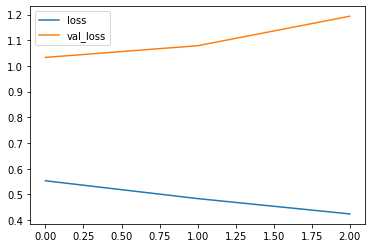

In [45]:
metrics = pd.DataFrame(model.history.history)
metrics[["loss","val_loss"]].plot()

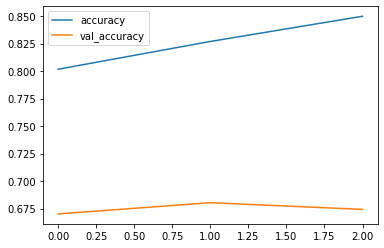

In [46]:
metrics[["accuracy","val_accuracy"]].plot()

### Evaluation

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
results = model.evaluate(x_test, y_cat_test)

print("Loss : ",results[0])
print("Accuracy : ",results[1]*100,"%")

10000/10000 [==============================] - 3s 329us/sample - loss: 1.1934 - accuracy: 0.6742
Loss :  1.1934245497703553
Accuracy :  67.41999983787537 %


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1000
           1       0.77      0.85      0.81      1000
           2       0.57      0.55      0.56      1000
           3       0.46      0.50      0.48      1000
           4       0.61      0.65      0.63      1000
           5       0.56      0.59      0.57      1000
           6       0.79      0.73      0.76      1000
           7       0.72      0.72      0.72      1000
           8       0.78      0.77      0.78      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.68     10000



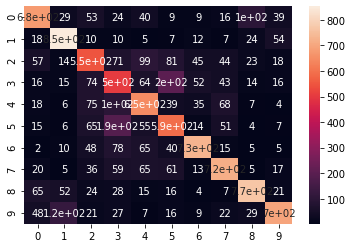

In [51]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True)
plt.show()

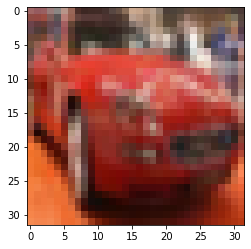

In [54]:
number = x_train[5].reshape(32,32,3)
plt.imshow(number,cmap="gray")
plt.show()

In [55]:
pre = model.predict_classes(number.reshape(1,32,32,3))
print("Prediction ",pre[0])

Prediction  1
